# Dimensionality Reduction in Linear Regression

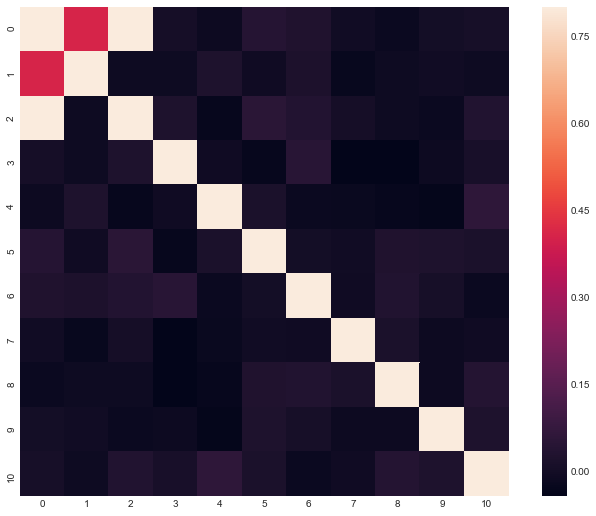

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Keeping 3 features using PLSR

R-squared regression: 0.816658338095
R-squared PLSR: 0.816658268679


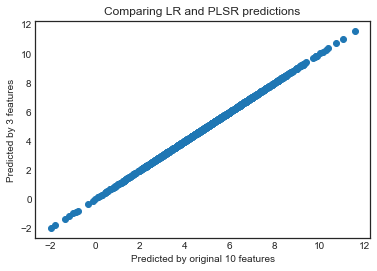

In [2]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

## Keeping 8 features using PLSR

R-squared regression: 0.816658338095
R-squared PLSR: 0.816658338095


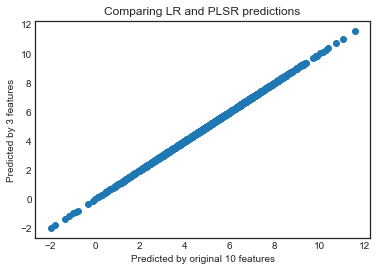

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 8 dimensions.
pls2 = PLSRegression(n_components=8)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls2.predict(X)
print('R-squared PLSR:', pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

## Keeping 4 features using PLSR

R-squared regression: 0.816658338095
R-squared PLSR: 0.816658338046


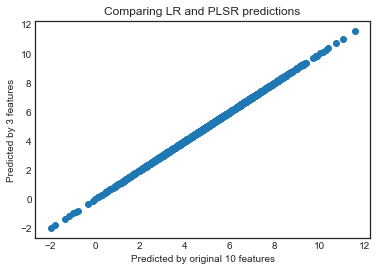

In [4]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 4 dimensions.
pls3 = PLSRegression(n_components=4)

# Reduce X to R(X) and regress on y.
pls3.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls3.predict(X)
print('R-squared PLSR:', pls3.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

## Keeping 2 features using PLSR

R-squared regression: 0.816658338095
R-squared PLSR: 0.816629935825


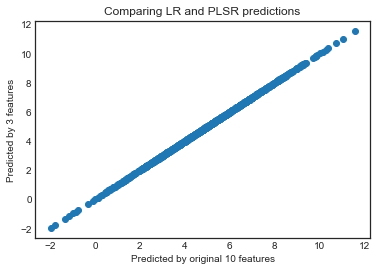

In [5]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 2 dimensions.
pls4 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls4.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls4.predict(X)
print('R-squared PLSR:', pls4.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

## Keeping 1 feature using PLSR – BAD

R-squared regression: 0.816658338095
R-squared PLSR: 0.81264608916


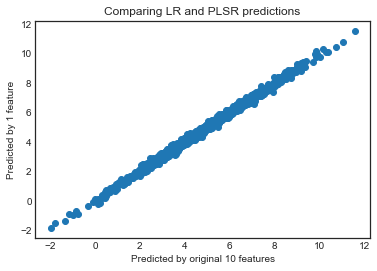

In [13]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 2 dimensions.
pls5 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls5.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls5.predict(X)
print('R-squared PLSR:', pls5.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 1 feature')
plt.title('Comparing LR and PLSR predictions')
plt.show()

## Calculating Error Using Cross-Validation

In [14]:
# Use 1, 2, 3, 4, 8 for cross-validation
# Dont train on full dataset – train on 2/3, test on 1/3, get error
# You will see where error starts changing

from sklearn.model_selection import cross_val_score

# 3 features
cross_val_score(pls1, X, y, cv=3)

array([ 0.82520651,  0.81861706,  0.79394047])

In [15]:
# 8 features
cross_val_score(pls2, X, y, cv=3)

array([ 0.82518932,  0.81860545,  0.7939413 ])

In [16]:
# 4 features
cross_val_score(pls3, X, y, cv=3)

array([ 0.82518973,  0.81860055,  0.79393945])

In [17]:
# 2 features
cross_val_score(pls4, X, y, cv=3)

array([ 0.82509879,  0.81901821,  0.79394432])

In [18]:
# 1 feature
cross_val_score(pls5, X, y, cv=3)

array([ 0.82257139,  0.7937796 ,  0.78945289])

It is clear that the cross-validation score drops most dramatically between 2 features and 1 feature. There is not much of a difference among cross-validation scores for models with 2 or more features. As a result, we can safely say that reducing to 2 features successfully reduces dimensionality for this linear regression model while getting rid of unrelated variance and noise.